In [63]:
import pandas as pd
from sklearn.cluster import DBSCAN,  KMeans, OPTICS
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns

In [64]:
data = pd.read_csv('dataa.csv', sep = ',')
data

,ФИО,Пол,Роль в мероприятии,Список компетенций,Должность,Начало трудового стажа,Место работы,Дата рождения,feature1,feature2,feature3,feature4,feature5,feature6,feature7
0,0,0,1,36,83,1993.000000,36,1975.000000,-0.168683,3.168650,9.343456,-1.568493,-2.175098e+00,6.181112e-01,-2.373866e+00
1,1,1,1,34,2,2000.000000,44,1977.000000,12.172361,1.909320,-4.893528,0.360889,-4.700776e-01,1.192233e-01,-2.170459e+00
2,2,0,1,26,47,2011.466546,44,1988.679208,8.590002,-0.874525,1.245231,-4.127800,-3.353448e+00,5.793364e-01,-4.292498e-01
3,3,0,1,7,48,2005.000000,44,1986.000000,5.300281,-3.444928,4.555605,-8.520903,-4.308845e+00,4.725987e+00,-1.031182e+01
4,4,0,1,5,81,2011.466546,44,1988.679208,-5.841847,9.258686,1.653345,0.571360,3.241864e-01,1.459440e-15,6.003816e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,708,0,1,2,83,2011.466546,44,1988.679208,0.395246,8.535900,0.970737,-3.451364,7.959877e-16,-1.106870e-16,1.961495e-16
706,709,1,1,34,83,2013.000000,8,1990.000000,-8.047304,-6.361686,-2.613589,-7.141867,-4.997863e+00,1.535965e-01,-5.303137e+00
707,710,1,1,1,59,2016.000000,44,1993.000000,2.422774,-0.594510,-4.515643,-2.628545,-3.862591e+00,1.524534e+00,-6.434879e-01
708,711,0,1,32,40,2011.466546,2,1988.679208,-1.984648,-10.260374,-6.197178,1.123215,-7.301041e-01,7.400600e+00,-3.752828e-01


In [65]:
id = data.ФИО
data = data.drop('ФИО', axis = 1)

Масштабирование

In [66]:
mmsc = MinMaxScaler()
dn = mmsc.fit_transform(data)
dn = pd.DataFrame(dn, columns = data.columns)
dn

,Пол,Роль в мероприятии,Список компетенций,Должность,Начало трудового стажа,Место работы,Дата рождения,feature1,feature2,feature3,feature4,feature5,feature6,feature7
0,0.0,1.0,0.947368,1.000000,0.325581,0.818182,0.954236,0.369628,0.545800,0.699008,0.292318,0.332255,0.425231,0.403100
1,1.0,1.0,0.894737,0.024096,0.488372,1.000000,0.956183,0.669529,0.507739,0.212293,0.361879,0.404643,0.402399,0.410873
2,0.0,1.0,0.684211,0.566265,0.755036,1.000000,0.967555,0.582474,0.423601,0.422157,0.200045,0.282228,0.423456,0.477411
3,0.0,1.0,0.184211,0.578313,0.604651,1.000000,0.964946,0.502530,0.345915,0.535328,0.041658,0.241666,0.613233,0.099763
4,0.0,1.0,0.131579,0.975904,0.755036,1.000000,0.967555,0.231764,0.729863,0.436109,0.369468,0.438364,0.396942,0.493814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,0.0,1.0,0.052632,1.000000,0.755036,1.000000,0.967555,0.383333,0.708018,0.412773,0.224433,0.424600,0.396942,0.493814
706,1.0,1.0,0.894737,1.000000,0.790698,0.181818,0.968841,0.178169,0.257760,0.290237,0.091377,0.212413,0.403972,0.291162
707,1.0,1.0,0.026316,0.710843,0.860465,1.000000,0.971762,0.432604,0.432064,0.225212,0.254099,0.260612,0.466715,0.469224
708,0.0,1.0,0.842105,0.481928,0.755036,0.045455,0.967555,0.325499,0.139928,0.167726,0.389364,0.393603,0.735640,0.479473


Количество кластеров

In [67]:
def NumCl(data):
  SSE = [] 
  for k in range(1, 15):
      kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(data)
      SSE.append(kmeans.inertia_)
 
  plt.plot(range(1, 15), SSE, marker = 's')
  plt.xlabel('number_of_clusters')
  plt.ylabel('SSE')
  plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

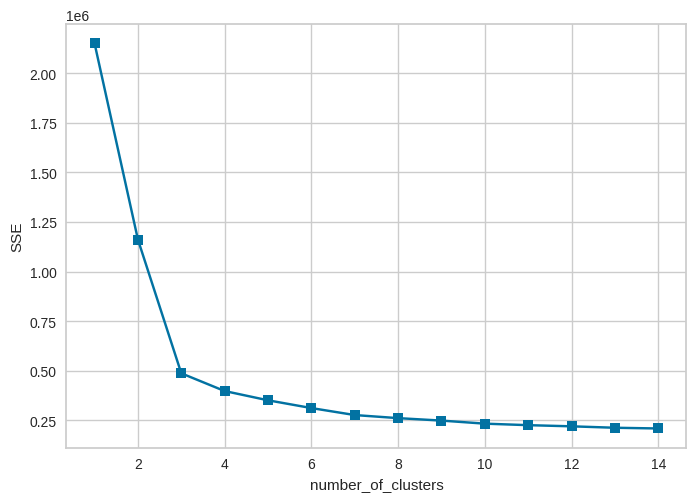

In [68]:
NumCl(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

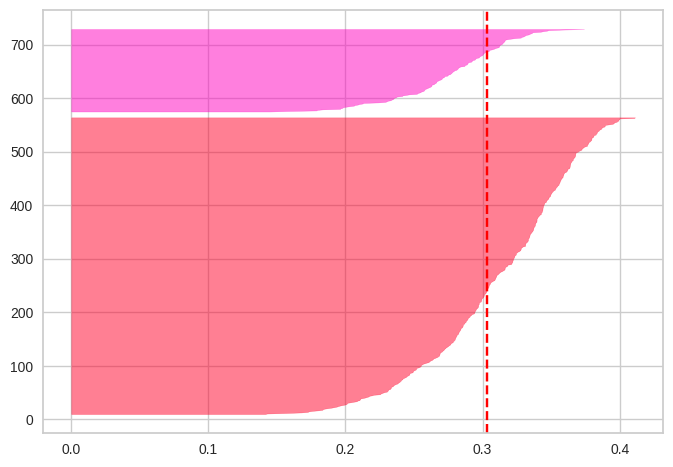

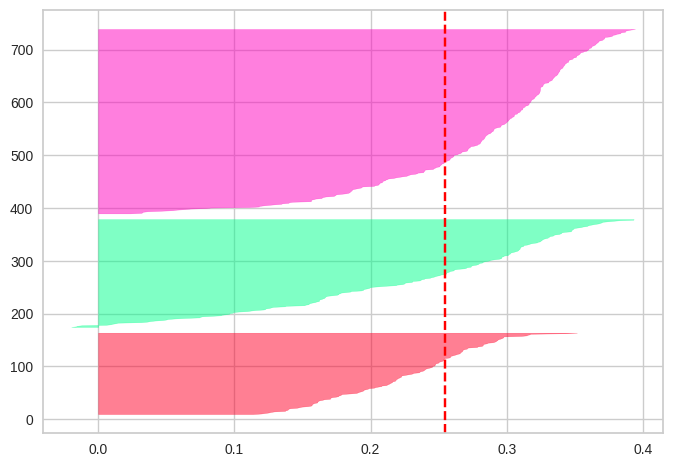

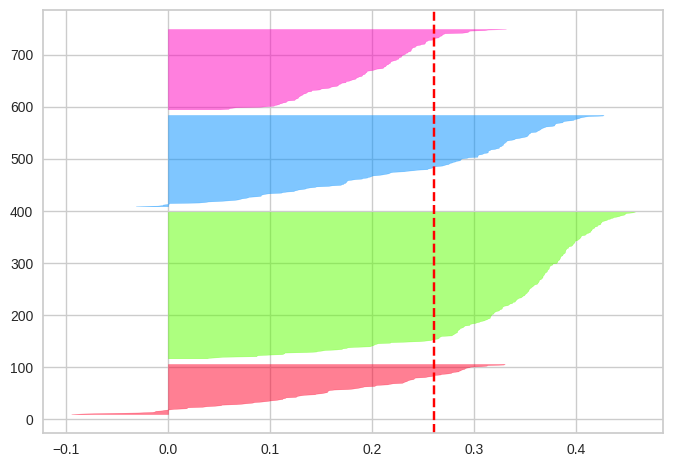

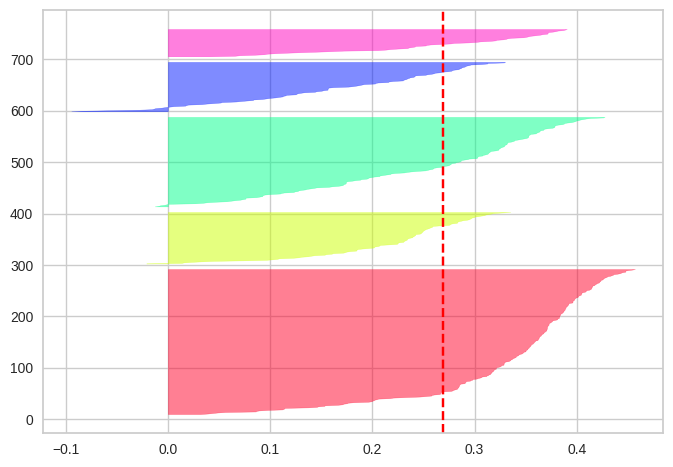

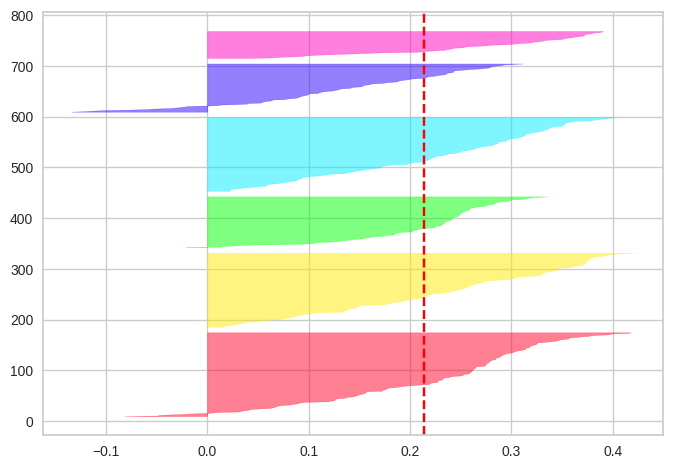

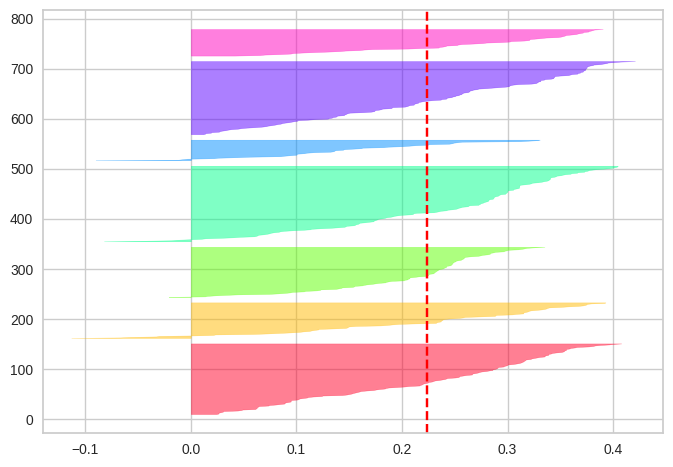

In [69]:
for i in range(2, 8):
    fig, (ax1) = plt.subplots(1)
    km = KMeans(n_clusters = i, random_state = 0)
    visualizer = SilhouetteVisualizer(km, colors = 'gist_rainbow', ax = ax1)
    visualizer.fit(dn)

In [70]:
db = DBSCAN(eps = 0.6, min_samples = 15).fit(dn)

core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 96


Кластеризация

In [71]:
def show2d(target_col, df):

  tsne = TSNE(n_components = 2, random_state = 0)
  projections = tsne.fit_transform(df)

  fig = px.scatter(projections, x = 0, y = 1, color = df[target_col], labels = {'color': target_col})
  fig.show()

In [72]:
model = KMeans(n_clusters = 3).fit(data)

f = model.labels_
ans = pd.DataFrame(id, columns = ['ID'])
ans['Segmentation'] = f

df_copy = data.copy()
df_copy['Segmentation'] = ans['Segmentation']

show2d('Segmentation', df_copy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [73]:
clustering = AgglomerativeClustering(n_clusters = 4,  affinity = 'euclidean', linkage = 'ward').fit(dn)

f = clustering.labels_
ans = pd.DataFrame(id, columns = ['ID'])
ans['Segmentation'] = f

df_copy = data.copy()
df_copy['Segmentation'] = ans['Segmentation']

show2d('Segmentation', df_copy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [74]:
f = db.labels_
ans = pd.DataFrame(id, columns = ['ID'])
ans['Segmentation'] = f

df_copy = data.copy()
df_copy['Segmentation'] = ans['Segmentation']

show2d('Segmentation', df_copy)